## GRIN’s Data Science Challenge

In [41]:
import pandas as pd
import itertools
import warnings
from pandas import datetime
import matplotlib.pyplot as plt

In [42]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

rides = pd.read_csv('D:/Data/rides.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [43]:
rides.head()

,rides
day2,
2018-08-01,49290
2018-08-02,49437
2018-08-03,55609
2018-08-04,53197
2018-08-05,46129


In [44]:
rides.rides[2]

55609

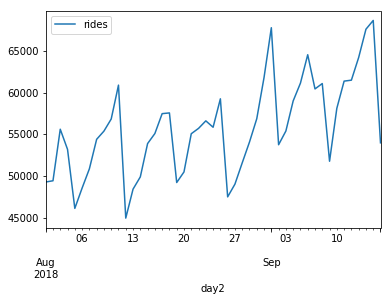

In [45]:
rides.plot()

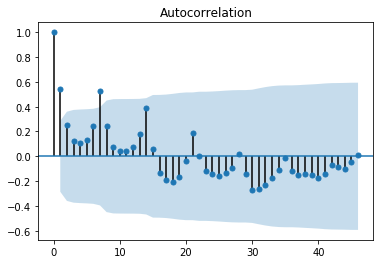

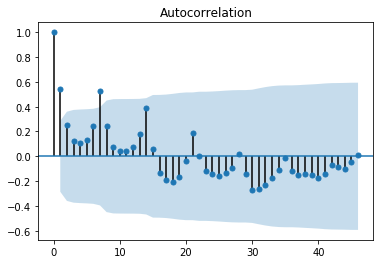

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rides)

### Converting series to stationary

In [47]:
rides.head()

,rides
day2,
2018-08-01,49290
2018-08-02,49437
2018-08-03,55609
2018-08-04,53197
2018-08-05,46129


In [48]:
rides.shift(1)

,rides
day2,
2018-08-01,NaN
2018-08-02,49290.0
2018-08-03,49437.0
2018-08-04,55609.0
2018-08-05,53197.0
2018-08-06,46129.0
2018-08-07,48557.0
2018-08-08,50864.0
2018-08-09,54402.0


In [49]:
rides_diff = rides.diff(periods=1)
# integrated of order 1, denoted by d (for di ff), one of the parameter of ARIMA model

In [50]:
rides_diff = rides_diff[1:]
rides_diff.head()

,rides
day2,
2018-08-02,147.0
2018-08-03,6172.0
2018-08-04,-2412.0
2018-08-05,-7068.0
2018-08-06,2428.0


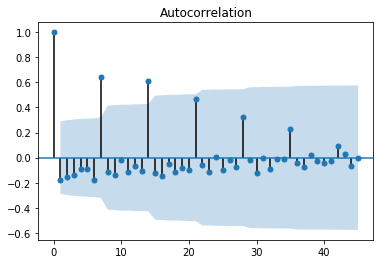

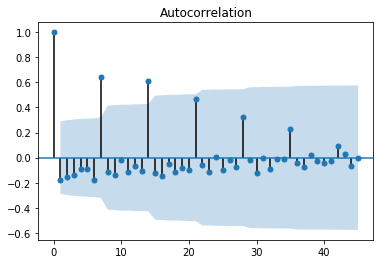

In [51]:
plot_acf(rides_diff)

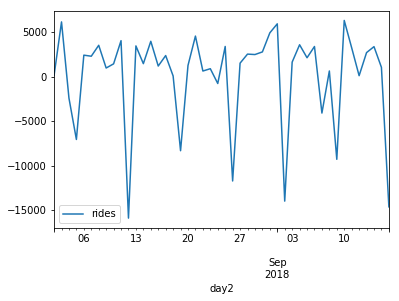

In [52]:
rides_diff.plot()

In [152]:
X = rides.values
train = X[0:38] # 37 data as train data
test = X[38:]  # 10 data as test data
predictions = []

In [153]:
train.size

38

# Autoreggresive AR Model

In [239]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [240]:
predictions = model_ar_fit.predict(start=38,end=47)

In [241]:
test

array([[61079],
       [51775],
       [58111],
       [61368],
       [61483],
       [64198],
       [67583],
       [68634],
       [53979]], dtype=int64)

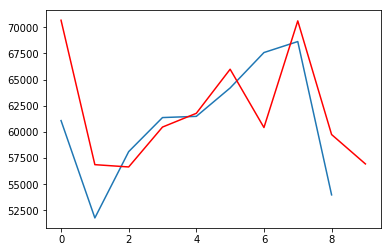

In [242]:
plt.plot(test)
plt.plot(predictions,color='red')

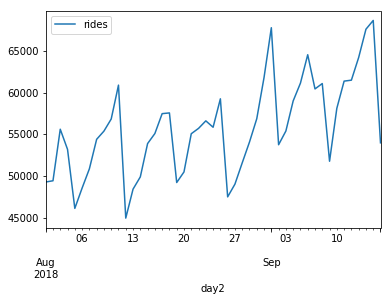

In [243]:
rides.plot()

# ARIMA model

In [244]:
from statsmodels.tsa.arima_model import ARIMA

In [245]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
#to check AR value
model_arima = ARIMA(train,order=(6, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

722.4213107468689


In [290]:
predictions= model_arima_fit.forecast(steps=38)[0]
predictions

array([67077.03722422, 59635.57077523, 58457.7521262 , 60784.73680816,
       62579.48034225, 65864.99062305, 63191.46734757, 67311.41343325,
       63697.54122347, 61790.55785351, 62984.53995619, 64307.66226048,
       67233.65059546, 65773.85884025, 68248.68642857, 66729.05985172,
       64992.16290213, 65433.29562987, 66290.90171747, 68725.05645666,
       68169.91683007, 69666.42870873, 69221.90938858, 67941.75233292,
       67983.51445349, 68469.20942596, 70381.9591798 , 70422.34311089,
       71387.28062884, 71459.00504625, 70646.68377856, 70536.19928919,
       70772.16937599, 72207.34005534, 72587.6517648 , 73288.80275984,
       73590.94809639, 73159.37205761])

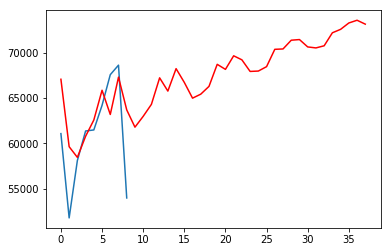

In [291]:
plt.plot(test)
plt.plot(predictions,color='red')


([<matplotlib.axis.XTick at 0x19794c18>,
 <a list of 20 Text xticklabel objects>)

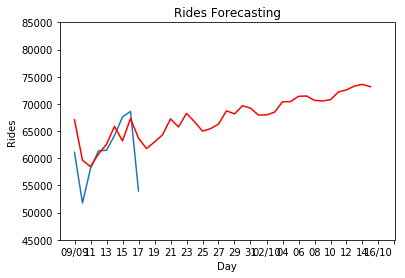

In [292]:
plt.plot(test)
plt.plot(predictions,color='red')
#plt.plot(day2,rides)
plt.xlabel('Day')
plt.ylabel('Rides')
plt.title('Rides Forecasting')
plt.yticks([45000,50000,55000,60000,65000,70000,75000,80000,85000])
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],['09/09','11','13','15','17','19','21','23','25','27','29','31','02/10','04','06','08','10','12','14','16/10'])
#plt.xticks()

In [293]:
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [294]:

warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 760.6026228869908
(0, 0, 1) 753.3145510871583
(0, 0, 2) 754.45741664212
(0, 0, 3) 756.4564874184563
(0, 0, 4) 758.3459056762337
(0, 1, 0) 741.9875224090213
(0, 1, 1) 734.6133839318057
(0, 1, 2) 731.8105353610526
(0, 1, 3) nan
(0, 2, 0) 754.1984316459198
(0, 2, 1) 728.6380054186768
(1, 0, 0) 753.0214616816342
(1, 0, 1) 754.5409712093794
(1, 0, 2) 811.7489523793087
(1, 0, 3) 779.0615098991077
(1, 1, 0) 742.5104414339297
(1, 1, 1) 732.8024950465337
(1, 2, 0) 745.869524221901
(1, 2, 1) 729.5286804683177
(2, 0, 0) 754.4530824092278
(2, 0, 1) 756.4287820617662
(2, 0, 3) 754.3844927745238
(2, 1, 0) 742.4540392196745
(2, 1, 1) 732.8098706427894
(2, 2, 0) 742.8903221855842
(2, 2, 1) 729.8875318425189
(2, 2, 2) 723.3655713280102
(2, 2, 4) 724.1918840693264
(3, 0, 0) 756.4148542730915
(3, 0, 1) 758.4142254942326
(3, 0, 2) 756.5242181084467
(3, 0, 3) 757.9064417080253
(3, 0, 4) 760.6689128743079
(3, 1, 0) 742.4791086593096
(3, 2, 0) 742.2089358381413
(3, 2, 1) 730.2997074101544
(3, 2, 2)